In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import datasets

import numpy as np
from matplotlib import pyplot as plt
iris = datasets.load_iris()
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [3]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.drop(labels=["sepal length (cm)","sepal width (cm)"],axis=1, inplace=True)
df['target'] = iris.target
df['target_name'] = df.target.apply(lambda x: iris.target_names[x])
df

,petal length (cm),petal width (cm),target,target_name
0,1.4,0.2,0,setosa
1,1.4,0.2,0,setosa
2,1.3,0.2,0,setosa
3,1.5,0.2,0,setosa
4,1.4,0.2,0,setosa
...,...,...,...,...
145,5.2,2.3,2,virginica
146,5.0,1.9,2,virginica
147,5.2,2.0,2,virginica
148,5.4,2.3,2,virginica


## plot on the graph

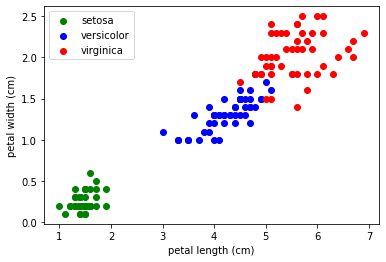

In [4]:
df1 = df[df['target'] == 0]
df2 = df[df['target'] == 1]
df3 = df[df['target'] == 2]
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color="green", label=df1.iloc[1:2,:]['target_name'].to_string(index=False))
plt.scatter(df2['petal length (cm)'], df2['petal width (cm)'], color="blue", label=df2.iloc[1:2,:]['target_name'].to_string(index=False))
plt.scatter(df3['petal length (cm)'], df3['petal width (cm)'], color="red",label=df3.iloc[1:2,:]['target_name'].to_string(index=False))
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend()
plt.show()

In [5]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)

prediction_data = df.iloc[:,:2]
y_predicted = km.fit_predict(prediction_data)
print(y_predicted)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 0 2 2 2 2
 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2
 2 2]


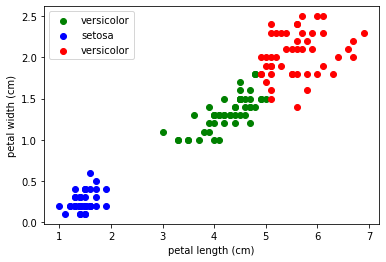

In [6]:
df['cluster'] = y_predicted
centroids = km.cluster_centers_


df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color="green", label=df1.iloc[1:2,:]['target_name'].to_string(index=False))
plt.scatter(df2['petal length (cm)'], df2['petal width (cm)'], color="blue", label=df2.iloc[1:2,:]['target_name'].to_string(index=False))
plt.scatter(df3['petal length (cm)'], df3['petal width (cm)'], color="red",label=df3.iloc[1:2,:]['target_name'].to_string(index=False))

plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend()
plt.show()

## Lets try scaling and see if that helps

In [7]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(df[['petal length (cm)']])
df['petal length (cm)'] = scaler.transform(df[['petal length (cm)']])
scaler.fit(df[['petal width (cm)']])
df['petal width (cm)'] = scaler.transform(df[['petal width (cm)']])
print(df)


     petal length (cm)  petal width (cm)  target target_name  cluster
0             0.067797          0.041667       0      setosa        1
1             0.067797          0.041667       0      setosa        1
2             0.050847          0.041667       0      setosa        1
3             0.084746          0.041667       0      setosa        1
4             0.067797          0.041667       0      setosa        1
..                 ...               ...     ...         ...      ...
145           0.711864          0.916667       2   virginica        2
146           0.677966          0.750000       2   virginica        2
147           0.711864          0.791667       2   virginica        2
148           0.745763          0.916667       2   virginica        2
149           0.694915          0.708333       2   virginica        2

[150 rows x 5 columns]


In [8]:
km = KMeans(n_clusters=3)

prediction_data = df.iloc[:,:2]
y_predicted = km.fit_predict(prediction_data)
print(y_predicted)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 2 0 0 0 0
 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


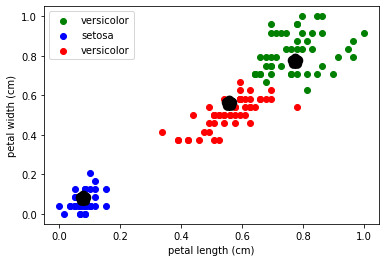

In [9]:
df['cluster'] = y_predicted
centroids = km.cluster_centers_

df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color="green", label=df1.iloc[1:2,:]['target_name'].to_string(index=False))
plt.scatter(df2['petal length (cm)'], df2['petal width (cm)'], color="blue", label=df2.iloc[1:2,:]['target_name'].to_string(index=False))
plt.scatter(df3['petal length (cm)'], df3['petal width (cm)'], color="red",label=df3.iloc[1:2,:]['target_name'].to_string(index=False))
plt.scatter(centroids[:,0], centroids[:,:1],color='black', marker="*", linewidths=10)
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend()
plt.show()

## IT didn't help :(

## Let's try Elbow now

In [10]:
prediction_data = df.iloc[:,:2]
arr = []
for k in range(1,10):
    km = KMeans(n_clusters=k)
    km.fit(prediction_data)
    arr.append(km.inertia_)
arr

[28.368353219727194,
 5.176463590044369,
 1.7018746881920963,
 1.1615234094205578,
 0.853861735391224,
 0.6798101576314027,
 0.5658013138564928,
 0.486178934934251,
 0.42906316296577396]

## Let's graph it

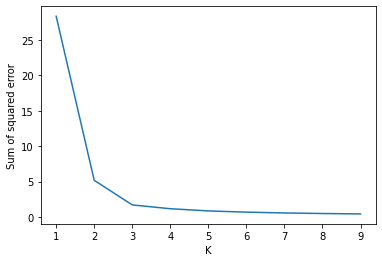

In [11]:
plt.xlabel('K')
plt.ylabel("Sum of squared error")
plt.plot(range(1,10),arr)

## Elbow is 3 

## How to get dot product (multiply matrices)

Given our matrices
1. a = [[1,4,-2],[3,5,6]]  2x3
1. b = [[5,2,8,-1],[3,6,4,5],[-2,9,7,-3]] 3x4
1. We can get multiply  A * B because 2x**3** **3**x4
1. We multiply **A**'s rows by **B**'s columns
1. **To find out if we can multiply the two or not. The A's columns has to be the same as B's rows (In our case its 3x3)
1. **However, we can't multiply B * A** because 3x4 2x3  **B**'s columns =/ **A**'s rows

In [12]:
a = [[1,4,-2],[3,5,6]]  # 2x3
b = [[5,2,8,-1],[3,6,4,5],[-2,9,7,-3]] # 3x4
# A * B = (A = 2x3) (B = 3x4) 
# We multiply rows by columns 
# [(1*5) + (4*3) + (-2 * -2),  (1 * 2) + (4*6) + (-2 * 9), (1 * 8) + (4 * 4) + (-2 * 7), (1 * -1) + (4 * 5) + (-2 * -3)]
# [(3*5) + (5 * 3) + (6 * -2), (3 * 2) + (5 * 6) + (6 * 9), (3 * 8) + (5 * 4) + (6 * 7), (3 * -1) + (5 * 5) + (6 * -3)]
# [5 + 12 + 4, 2 + 24 + -18, 8 + 16 + - 14, -1 + 20 + 6]
# 15 + 15 + -12, 6 + 30 + 54, 24 + 20 + 42, -3 + 25 + -18
# [21, 8, 10, 25]
# [18, 90, 86, 4]

np.dot(a,b)

array([[21,  8, 10, 25],
       [18, 90, 86,  4]])

## How to transpose a matrix

In [13]:
a = np.array([[1,4],[3,5],[6,4],[4,2],[15,10]])

print(a,end=" = a\n\n")
print(a.T,end=" = aT")

[[ 1  4]
 [ 3  5]
 [ 6  4]
 [ 4  2]
 [15 10]] = a

[[ 1  3  6  4 15]
 [ 4  5  4  2 10]] = aT

## Identity matrix
1. I * A = A (no changes)
1. A * I = A (no changes)
1. Has to have same dimensions

In [14]:
a = [[1,2,3],[4,5,6],[7,8,9]]  # 3x3
b = [[1,0,0],[0,1,0],[0,0,1]] # 3x3

np.dot(b,a)

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [19]:
a = [[1000,400,1200]]  # 1x3
b = [[30,40,50],[5,10,15],[2,5,7]] # 3x3
# A * B = (A = 2x3) (B = 3x4) 
# We multiply rows by columns 
# [(1000 * 30) + (400*5) + (1200 * 2),  (1000 * 40) + (400*10) + (1200 * 5), (1000 * 50) + (400 * 15) + (1200 * 7)]
# [30,000 + 2000 + 2400, 40,000 + 4000 + 6000, 50,000 + 6000 + 8400]
# [34,400, 50,000, 64,400]

np.dot(a,b)

array([[34400, 50000, 64400]])